In [8]:
from iros.io import fetch_simulation
from iros.mask import fetch_camera, encode, decode, count
from iros.images import compose, argmax

from iros.assets import path_wfm_mask

# Example 1:

Load simulation and mask data with upscaling. Compute detector counts. Compute balanced reconstructed image by cross-correlation. Compose balanced reconstructions from two camera into a single image. Find the maximum in the reconstructed composed image and in the components images.

In [17]:
sdl = fetch_simulation("/home/deppep/Dropbox/Progetti/masks/simulations/id00/")
wfm = fetch_camera(path_wfm_mask, (5, 8))

detector_1a = count(wfm, sdl.detected["cam1a"])
balanced_1a, var_1a = decode(wfm, detector_1a)

detector_1b = count(wfm, sdl.detected["cam1b"])
balanced_1b, var_1b = decode(wfm, detector_1b)

composed, composed_f = compose(balanced_1a, balanced_1b)
max_composed = argmax(composed)
max_balanced_1a, max_balanced_1b = composed_f(*max_composed)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

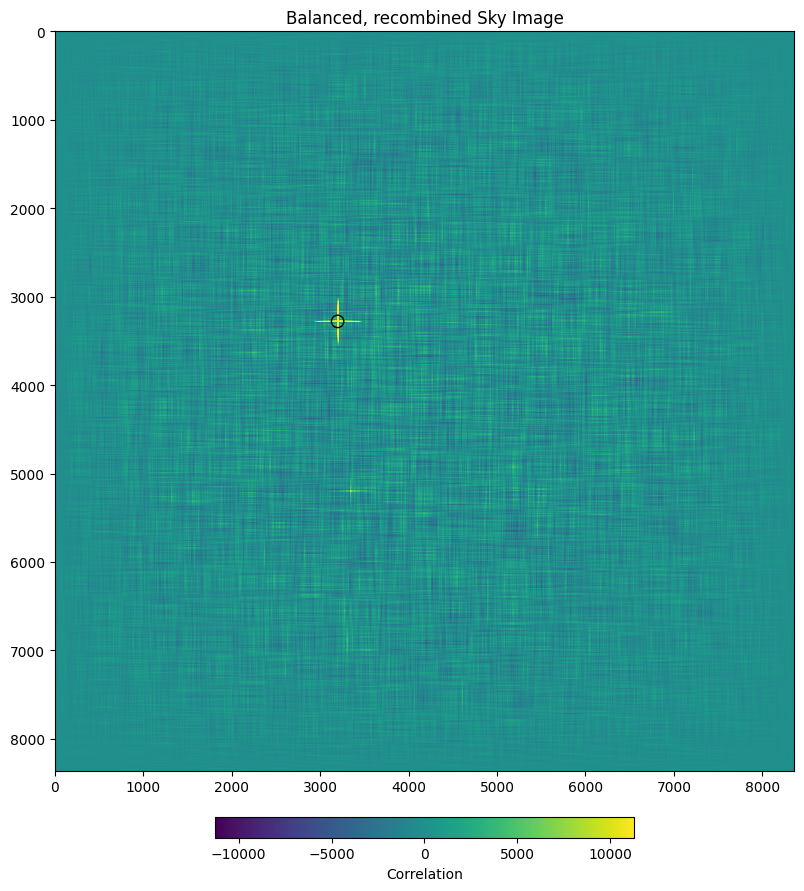

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
c0 = ax.imshow(composed, vmax=-np.min(composed))
ax.scatter(max_composed[1], max_composed[0], s=80, facecolors='none', edgecolors='k')
fig.colorbar(c0, ax=ax, label="Correlation", location="bottom", pad=0.05, shrink=.45)
ax.set_title("Balanced, recombined Sky Image")
plt.show()

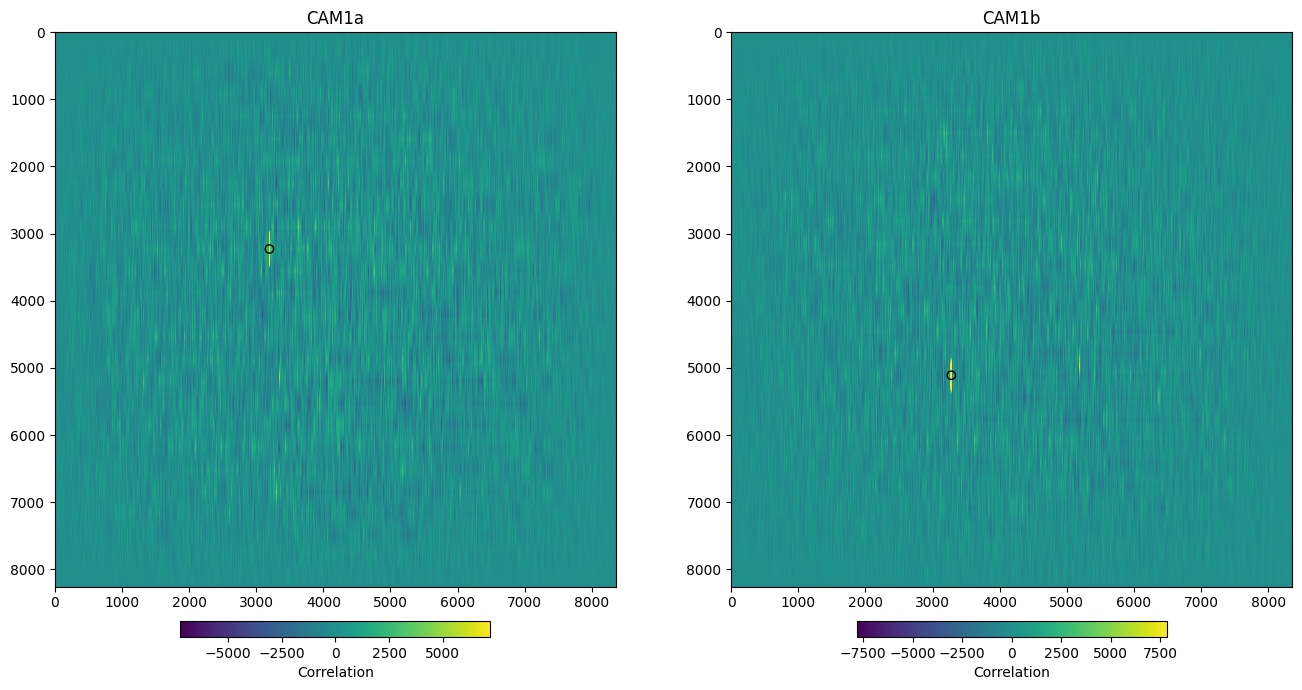

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
for ax, b, bmax, title in zip(
        axs,
        [balanced_1a, balanced_1b],
        [max_balanced_1a, max_balanced_1b],
        ["CAM1a", "CAM1b"],
):
    c0 = ax.imshow(b, vmax=-np.min(b))
    ax.scatter(bmax[1], bmax[0], facecolors='none', edgecolors='k')
    fig.colorbar(c0, ax=ax, label="Correlation", location="bottom", pad=0.05, shrink=.55)
    ax.set_title(title)
plt.show()